# CookBook of Useful Pandas Code

In this notebook, we collect some useful code snippets for getting stuff done in Pandas.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

First, we load some data to be used in the code snippets below

In [2]:
data_path = Path.home() / "datasets" / "tabular_practice"
df_android = pd.read_csv(data_path / "googleplaystore.csv")
df_android.drop(10472, inplace=True)  # Remove invalid row
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Convert Column Data Types

When reading in a CSV file, we often have most column `dtypes` equal to `object`. Not only does this need more memory, but we also cannot apply certain operations on `object` if the underlying type is really numerical or categorical.

**Note**: One reason why a column `dtype` is `object` may be the presence of missing values, as for example the integer types do not allow for `NaN`. It may be wise to do type conversion after dealing with missing values.

In [3]:
df_android.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### Convert Columns to Numerical Types

Here is how to do this for all columns, and simply ignore columns if the conversion does not work for all values.

In [4]:
# Convert columns to number types if possible

df_android = df_android.apply(pd.to_numeric, errors="ignore")
df_android.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


### Convert Columns to Category Types

Columns can be converted to categorical type if their value range is finite and fixed. Once a column type is category, a number of special operations can be used: https://pandas.pydata.org/docs/user_guide/categorical.html

In [5]:
# Look at the number of unique values in order to spot potentially categoricals
df_android.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

In [6]:
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Convert some columns to category type
category_columns = ["Category", "Type", "Content Rating"]
category_dict = {name: "category" for name in category_columns}
df_android = df_android.astype(category_dict)
df_android.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             10840 non-null  object  
 1   Category        10840 non-null  category
 2   Rating          9366 non-null   float64 
 3   Reviews         10840 non-null  int64   
 4   Size            10840 non-null  object  
 5   Installs        10840 non-null  object  
 6   Type            10839 non-null  category
 7   Price           10840 non-null  object  
 8   Content Rating  10840 non-null  category
 9   Genres          10840 non-null  object  
 10  Last Updated    10840 non-null  object  
 11  Current Ver     10832 non-null  object  
 12  Android Ver     10838 non-null  object  
dtypes: category(3), float64(1), int64(1), object(8)
memory usage: 965.0+ KB


## Remove Duplicates according to some Rule

We would like to filter rows such that there are no duplicates w.r.t. a subset of columns. Often, we'd like to implement a drop rule which depends on values of other columns. This can be done by using `drop_duplicates`, first sorting the dataframe.

In [8]:
# We'd like to keep one row per unique value of "App", namely the row which maximum "Reviews"
# We first sort the the rows w.r.t. the grouping column "App", then "Reviews".
# Next, `drop_duplicates` by default keeps the first occurence.

df_android_unique = df_android.sort_values(["App", "Reviews"], ascending=False).drop_duplicates("App")

In [9]:
df_android_unique.query("App == 'ROBLOX'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [10]:
df_android.query("App == 'ROBLOX'").sort_values("Reviews")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


## Count Number of Occurencies of Words in Strings

A column may contain strings consisting of words, or lists consisting of entries. We would like to count the number of words occurring in strings across the whole table, or within groups. This can be done by using `str.get_dummies`.

In [11]:
# The "Genres" column contains one or more genres, separated by ";". We'd like to count frequencies of genres.

freq_android_genre = df_android_unique["Genres"].str.get_dummies(sep=";").sum().sort_values(ascending=False) / len(df_android_unique)

In [12]:
freq_android_genre

Tools                      0.085827
Education                  0.066467
Entertainment              0.061290
Business                   0.043483
Medical                    0.040895
Personalization            0.038927
Productivity               0.038720
Lifestyle                  0.038306
Finance                    0.035718
Sports                     0.034683
Communication              0.032716
Action                     0.032198
Health & Fitness           0.030024
Photography                0.029092
News & Magazines           0.026297
Social                     0.024744
Books & Reference          0.023294
Casual                     0.023294
Travel & Local             0.022673
Simulation                 0.021327
Shopping                   0.020913
Arcade                     0.020603
Dating                     0.017600
Video Players & Editors    0.017083
Puzzle                     0.014701
Maps & Navigation          0.013562
Role Playing               0.011906
Food & Drink               0

Here, `str.get_dummies` creates an indicator dataframe, whose columns are all words appearing in any "Genres" value.

In [13]:
df_android_unique["Genres"].str.get_dummies(sep=";").head()

,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2575,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Select sub-dataframe according to string matching

Often, we would like to dive deep on a subset of rows, where a categorical variables lies in a subset of values. This can be done with `str.contains`.

In [14]:
# The idea is to use `str.contains` with a regexp of the form "A|B|C". A row is selected if the value contains any
# of the words in there
genres_to_select = ["Tools", "Education", "Entertainment", "Business"]
regex = "|".join(genres_to_select)
indicator = df_android_unique["Genres"].str.contains(regex)
df_android_zoomin = df_android_unique[indicator]
df_android_zoomin.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up
9222,英漢字典 EC Dictionary,FAMILY,4.3,55408,Varies with device,"1,000,000+",Free,0,Everyone,Education,"January 8, 2018",Varies with device,Varies with device
5513,中国語 AQリスニング,FAMILY,NaN,21,17M,"5,000+",Free,0,Everyone,Education,"June 22, 2016",2.4.0,4.0 and up
5569,【Miku AR Camera】Mikuture,FAMILY,4.4,36268,41M,"1,000,000+",Free,0,Teen,Entertainment,"April 25, 2017",3.0.15,4.2 and up
9200,বাংলাflix,FAMILY,4.2,1111,7.3M,"100,000+",Free,0,Everyone,Entertainment,"June 5, 2018",3.6.1,4.1 and up
6006,বাংলা টিভি প্রো BD Bangla TV,FAMILY,4.3,193,14M,"10,000+",Free,0,Everyone,Entertainment,"April 29, 2017",1.3,4.0 and up
9117,لعبة تقدر تربح DZ,FAMILY,4.2,238,6.8M,"10,000+",Free,0,Everyone,Education,"November 18, 2016",6.0.0.0,4.1 and up
7187,РееI Smart Remote MP3 CD Player,TOOLS,3.2,27,2.7M,"5,000+",Free,0,Everyone,Tools,"January 22, 2018",1.2,4.0 and up
5832,¡Ay Caramba!,FAMILY,NaN,0,549k,1+,Paid,$1.99,Everyone,Education,"June 13, 2014",1.2,3.0 and up


## Count Number of Occurencies of Unique Values in a Series (or DataFrame)

This is obtained by `value_counts`. No need to combine `groupby`, `count`, `sort_values`.

In [15]:
df_android_unique["Category"].value_counts()

Category
FAMILY                 1874
GAME                    946
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               107
ENTERTAINMENT            87
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

If `value_counts` is done on a dataframe, the unique combinations of values are counted. If a certain combination does not appear, it is not included in the result (counts are positive). The result dataframe has a multi-index.

In [16]:
df_android_unique[["Type", "Content Rating"]].value_counts()

Type  Content Rating 
Free  Everyone           7250
      Teen                984
Paid  Everyone            653
Free  Mature 17+          375
      Everyone 10+        290
Paid  Teen                 52
      Everyone 10+         31
      Mature 17+           18
Free  Adults only 18+       3
      Unrated               2
Name: count, dtype: int64

By default, `sort_values` returns rows in descending order w.r.t. counts, but sorting can be skipped (in which case the multi-index looks more as expected).

In [17]:
df_android_unique[["Type", "Content Rating"]].value_counts(sort=False)

Type  Content Rating 
Free  Adults only 18+       3
      Everyone           7250
      Everyone 10+        290
      Mature 17+          375
      Teen                984
      Unrated               2
Paid  Everyone            653
      Everyone 10+         31
      Mature 17+           18
      Teen                 52
Name: count, dtype: int64

## Find most frequent values covering a certain percentage of the total

This can be done by `value_counts` and `cumsum`, then extracting the index.

In [18]:
# Find values of "Category" which cover 95% of the total
cat_vals_cumsum = df_android_unique["Category"].value_counts(normalize=True).cumsum()
cat_vals_cover_95_perc = cat_vals_cumsum[cat_vals_cumsum <= 0.95].index
cat_vals_cover_95_perc

CategoricalIndex(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL',
                  'PERSONALIZATION', 'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE',
                  'SPORTS', 'COMMUNICATION', 'HEALTH_AND_FITNESS',
                  'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL',
                  'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'SHOPPING',
                  'DATING', 'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION',
                  'FOOD_AND_DRINK', 'EDUCATION', 'ENTERTAINMENT',
                  'AUTO_AND_VEHICLES'],
                 categories=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', ..., 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'], ordered=False, dtype='category', name='Category')

## The Seaborn Plotting Library

The `seaborn` library sits on top of `matplotlib`. It allows for very powerful plots, which can visualize variations in more than two variables. It also improves visual defaults. And it works very well together with `pandas`.

Here is a tutorial: https://seaborn.pydata.org/tutorial.html


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

We'll look at an example for a *relational plot*, which is a powerful extension of a scatter plot. While the latter can visualize the relationship between two numerical variables, a relational plot can visualize variations in up to 7 variables (4 numerical, 3 categorical).

**Note**: Relational plots generalize other types of plots as well, scatter is just the default. The up to 5 additional dof's are the same for the different kinds.

In [20]:
housing = pd.read_csv(data_path / "housing.csv")

columns = ["Gr Liv Area", "SalePrice", "Overall Qual", "Garage Area", "Rooms", "Year"]
housing[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gr Liv Area   2930 non-null   int64  
 1   SalePrice     2930 non-null   int64  
 2   Overall Qual  2930 non-null   int64  
 3   Garage Area   2929 non-null   float64
 4   Rooms         2930 non-null   object 
 5   Year          2930 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 137.5+ KB


In [21]:
housing[columns].describe(include="all")

,Gr Liv Area,SalePrice,Overall Qual,Garage Area,Rooms,Year
count,2930.000000,2930.000000,2930.000000,2929.000000,2930,2930
unique,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,6 rooms or less,1999 or older
freq,NaN,NaN,NaN,NaN,1660,2147
mean,1499.690444,180796.060068,6.094881,472.819734,NaN,NaN
std,505.508887,79886.692357,1.411026,215.046549,NaN,NaN
min,334.000000,12789.000000,1.000000,0.000000,NaN,NaN
25%,1126.000000,129500.000000,5.000000,320.000000,NaN,NaN
50%,1442.000000,160000.000000,6.000000,480.000000,NaN,NaN
75%,1742.750000,213500.000000,7.000000,576.000000,NaN,NaN


A standard scatter plot could relate two variables:

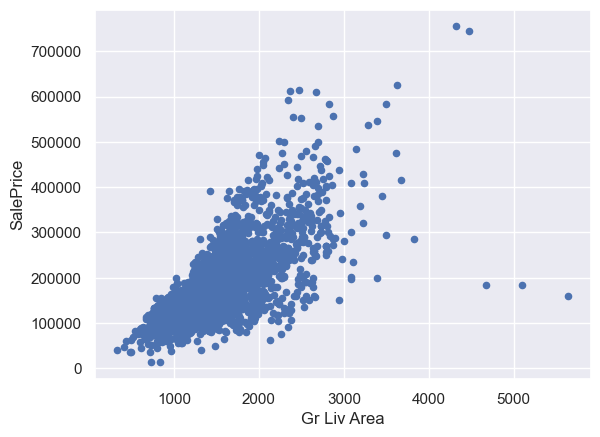

In [22]:
housing.plot.scatter(x=columns[0], y=columns[1])
plt.show()

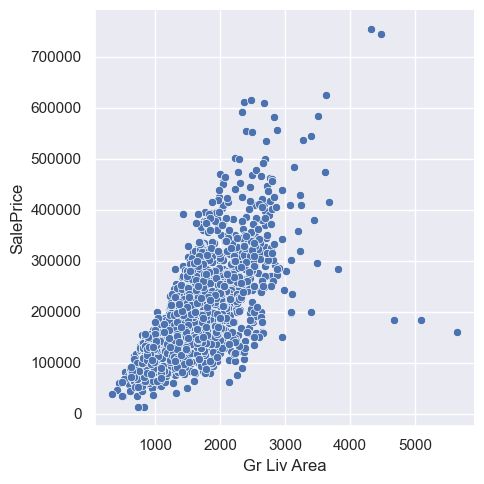

In [23]:
# This looks better in seaborn

sns.relplot(data=housing, x=columns[0], y=columns[1])
plt.show()

Two more numerical variables can be taken into account via:

* `hue`: Color from a palette
* `size`: Size of dot symbol

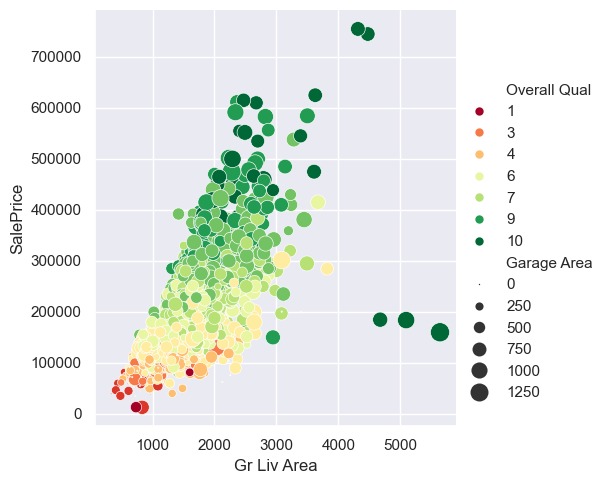

In [24]:
sns.relplot(
    data=housing, x="Gr Liv Area", y="SalePrice",
    hue='Overall Qual', palette='RdYlGn',
    size='Garage Area', sizes=(1,200)
)
plt.show()

Here, the palette varies from red over yellow to green, and dot sizes vary from 1 to 200. Except from some outliers (who may be more affordable for other reasons), we see how increases in `Overall Qual` and `Garage Area` imply increases in `SalePrice`.

We can take up to three further categorical variables into account:

* `style`: Symbol used for dot
* `col`: Subplots along column direction (horizontal)
* `row`: Subplots along row dimension (vertical) -- not used in example here

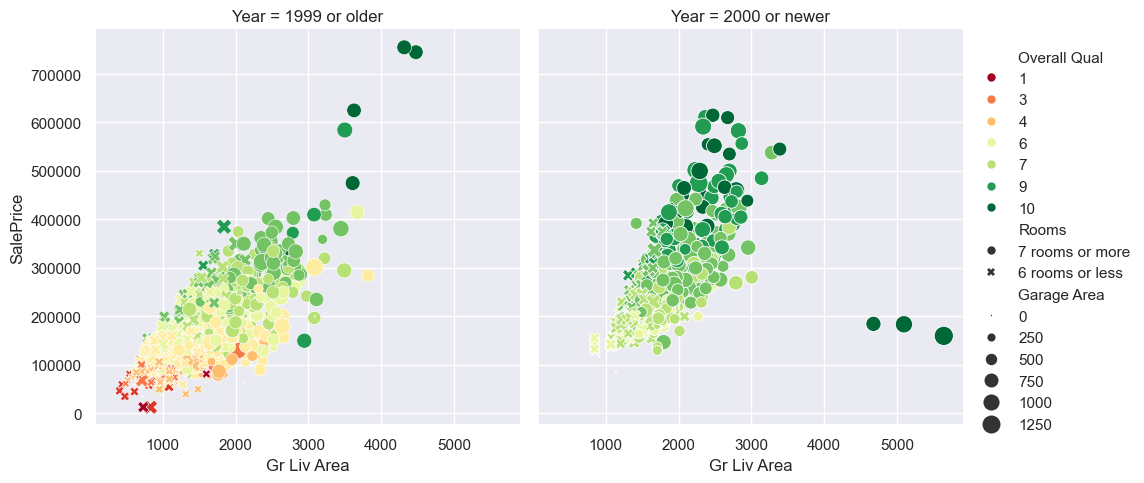

In [25]:
sns.relplot(
    data=housing, x="Gr Liv Area", y="SalePrice",
    hue='Overall Qual', palette='RdYlGn',
    size='Garage Area', sizes=(1,200),
    style="Rooms",
    col="Year",
)
plt.show()

## Example for Merging Data from Different Tables

This is from the *Python Data Science Handbook*

In [26]:
data_path = Path.home() / "datasets" / "tabular_practice"
pop = pd.read_csv(data_path / "state-population.csv")
areas = pd.read_csv(data_path / "state-areas.csv")
abbrevs = pd.read_csv(data_path / "state-abbrevs.csv")

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state/region  2544 non-null   object 
 1   ages          2544 non-null   object 
 2   year          2544 non-null   int64  
 3   population    2524 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.6+ KB


In [27]:
areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          52 non-null     object
 1   area (sq. mi)  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [28]:
abbrevs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         51 non-null     object
 1   abbreviation  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [29]:
pop.head(20)

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
5,AL,total,2011,4801627.0
6,AL,total,2009,4757938.0
7,AL,under18,2009,1134192.0
8,AL,under18,2013,1111481.0
9,AL,total,2013,4833722.0


In [30]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [31]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Our goal is to compute the population density (in people per square mile) in 2010 for every state and produce a ranked list.

* `pop` contains the population in "population", the abbreviation of the state name in "state/region"
* `areas` contains the area in "area (sq. mi)", the state name in "state"
* `abbrevs` maps state names to their abbreviations

Let us use joins to build a table with columns "state" (full name), "population", "area (sq. mi)", from which we can easily produce the desired result.

In [32]:
pop_total_2010 = pop.query("ages == 'total' and year == 2010")
# We use an outer join to make sure no data is eliminated due to mismatches
pop_per_state = pd.merge(pop_total_2010, abbrevs, left_on="state/region", right_on="abbreviation", how="outer")
pop_per_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state/region  53 non-null     object 
 1   ages          53 non-null     object 
 2   year          53 non-null     int64  
 3   population    53 non-null     float64
 4   state         51 non-null     object 
 5   abbreviation  51 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.6+ KB


In [33]:
pop_per_state[pop_per_state["state"].isnull()]

,state/region,ages,year,population,state,abbreviation
51,PR,total,2010,3721208.0,NaN,NaN
52,USA,total,2010,309326295.0,NaN,NaN


In [34]:
pop_per_state = pop_per_state[pop_per_state["state/region"] != "USA"]
pop_per_state.loc[pop_per_state["state/region"] == "PR", "state"] = "Puerto Rico"

In [35]:
pop_per_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state/region  52 non-null     object 
 1   ages          52 non-null     object 
 2   year          52 non-null     int64  
 3   population    52 non-null     float64
 4   state         52 non-null     object 
 5   abbreviation  51 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.8+ KB


In [36]:
pop_per_state.head()

,state/region,ages,year,population,state,abbreviation
0,AL,total,2010,4785570.0,Alabama,AL
1,AK,total,2010,713868.0,Alaska,AK
2,AZ,total,2010,6408790.0,Arizona,AZ
3,AR,total,2010,2922280.0,Arkansas,AR
4,CA,total,2010,37333601.0,California,CA


In [37]:
pop_per_state = pop_per_state[["state", "population"]]

In [38]:
# Once more, we use an outer join to be careful
pop_and_area_2010 = pd.merge(pop_per_state, areas, on="state", how="outer")
pop_and_area_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   population     52 non-null     float64
 2   area (sq. mi)  52 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


<Axes: ylabel='state'>

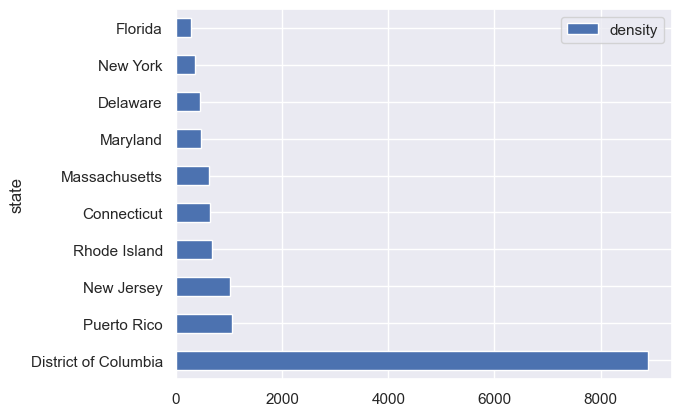

In [39]:
pop_and_area_2010["density"] = pop_and_area_2010["population"] / pop_and_area_2010["area (sq. mi)"]
states_ranked_by_density = pop_and_area_2010.sort_values("density", ascending=False)
states_ranked_by_density.head(10).plot(x="state", y="density", kind="barh")

In [40]:
states_ranked_by_density

,state,population,area (sq. mi),density
8,District of Columbia,605125.0,68,8898.897059
51,Puerto Rico,3721208.0,3515,1058.665149
30,New Jersey,8802707.0,8722,1009.253268
39,Rhode Island,1052669.0,1545,681.339159
6,Connecticut,3579210.0,5544,645.600649
21,Massachusetts,6563263.0,10555,621.815538
20,Maryland,5787193.0,12407,466.445797
7,Delaware,899711.0,1954,460.445752
32,New York,19398228.0,54475,356.094135
9,Florida,18846054.0,65758,286.597129


## Extract Regular Expression Patterns from Strings

In [81]:
data_path = Path.home() / "datasets" / "tabular_practice"
world_dev = pd.read_csv(data_path / "World_dev.csv")

world_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CountryCode                                 247 non-null    object 
 1   ShortName                                   247 non-null    object 
 2   TableName                                   247 non-null    object 
 3   LongName                                    247 non-null    object 
 4   Alpha2Code                                  244 non-null    object 
 5   CurrencyUnit                                214 non-null    object 
 6   SpecialNotes                                164 non-null    object 
 7   Region                                      214 non-null    object 
 8   IncomeGroup                                 214 non-null    object 
 9   Wb2Code                                     246 non-null    object 
 10  NationalAccoun

In [82]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
world_dev.rename(col_renaming, axis=1, inplace=True)

We can use `str.extract` with a regex in order to extract the first occurence of one or more patterns.

* The regex has to contain a capture group `(...)` for each pattern to be extracted
* A capture group can be named: `(?P<name>...)` ensures the matches occur as column "name". Non-named capture groups lead to integer column names

In [83]:
pattern = r"(?P<Year>[1-2][0-9]{3})"
years = world_dev["SpecialNotes"].str.extract(pattern)
years.head(20)

,Year
0,2013
1,NaN
2,NaN
3,NaN
4,NaN
5,2013
6,2012
7,NaN
8,2004
9,NaN


In [84]:
world_dev = world_dev.set_index("ShortName")
world_dev.head()

,CountryCode,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
ShortName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
Albania,ALB,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
Algeria,DZA,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,1980,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
American Samoa,ASM,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,NaN,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
Andorra,ADO,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,2000,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


We can use `str.extractall` to extract all matches of one or more capture groups of a regex.

**Note**: In order for the result of `extractall` to be readable, we first set the index to the country name.

In [85]:
pattern = r"(?P<Years>[1-2][0-9]{3})"

years = world_dev["SpecialNotes"].str.extractall(pattern)
years.head(20)

Years
ShortName           match      
Afghanistan         0      2013
Angola              0      2013
                    1      2000
                    2      2002
Antigua and Barbuda 0      2012
                    1      2000
                    2      2006
Argentina           0      2004
Aruba               0      2000
                    1      2011
                    2      1994
                    3      1999
                    4      1995
                    5      2000
Australia           0      1990
                    1      2008
Austria             0      1999
                    1      1999
Azerbaijan          0      2012
Bahrain             0      2010

Note how the index is extended by another level `match`, which counts the number of matches (there is one row per match). Also note the column name "Years" coming from the named capture group in the regex.

In [86]:
world_dev["IESurvey"].head(30)

ShortName
Afghanistan                         Integrated household survey (IHS), 2008
Albania                   Living Standards Measurement Study Survey (LSM...
Algeria                             Integrated household survey (IHS), 1995
American Samoa                                                          NaN
Andorra                                                                 NaN
Angola                           Integrated household survey (IHS), 2008/09
Antigua and Barbuda                                                     NaN
Arab World                                                              NaN
Argentina                           Integrated household survey (IHS), 2012
Armenia                             Integrated household survey (IHS), 2012
Aruba                                                                   NaN
Australia                    Expenditure survey/budget survey (ES/BS), 2003
Austria                             Integrated household survey (IHS), 2004
Az

In the "IESurvey" column, years appear either as "2008" or "2008/09", where the latter is short for "2008", "2009". Suppose we'd like to count the total number of years in that column.

In [87]:
pattern = r"(?P<Year1>[1-2][0-9]{3})/?(?P<Year2>[0-9]{2})?"

years = world_dev["IESurvey"].str.extractall(pattern)
years.head(20)

,,Year1,Year2
ShortName,match,,
Afghanistan,0,2008,NaN
Albania,0,2011,12
Algeria,0,1995,NaN
Angola,0,2008,09
Argentina,0,2012,NaN
Armenia,0,2012,NaN
Australia,0,2003,NaN
Austria,0,2004,NaN
Azerbaijan,0,2011,12


We still need to turn the "Year2" values into complete years.

In [88]:
# Here, we extract the first 2 digits of "Year1" and prepend them to "Year2"
# If "Year2" is NaN, it remains NaN

years["Year2"] = years["Year1"].str[0:2].str.cat(years["Year2"])
years.head()

,,Year1,Year2
ShortName,match,,
Afghanistan,0,2008,NaN
Albania,0,2011,2012
Algeria,0,1995,NaN
Angola,0,2008,2009
Argentina,0,2012,NaN


In [94]:
# In order to count the total number of years, we bring together the two columns, which can be done with `melt`

years.melt(value_vars=("Year1", "Year2"))["value"].value_counts()

value
2012    41
2010    38
2011    30
2009    14
2013    14
2008     8
2005     8
2007     7
2006     6
2004     4
1998     3
1999     3
2000     2
1995     2
2003     1
2002     1
1993     1
1992     1
Name: count, dtype: int64